In [2]:
import pandas as pd

xls = pd.ExcelFile('/content/Map.xlsx')
df1 = pd.read_excel(xls, 'Intersections')
df2 = pd.read_excel(xls, 'InstalledFeatures')

In [9]:
df_int_feat = pd.merge(df1, df2, left_on = 'ID', right_on = 'intersectionID')

In [12]:
df_int_feat = df_int_feat.sort_values('FeatureID')

In [17]:
df_int_feat = df_int_feat.drop(['Unnamed: 0_x', 'ID_x', 'Unnamed: 0_y', 'ID_y', 'intersectionID'], axis=1)

In [ ]:
df_int_feat.FeatureID

cond = df_int_feat.FeatureID < 2
subset_a = df_int_feat[cond].dropna()
subset_b = df_int_feat[~cond].dropna()

print(subset_a)

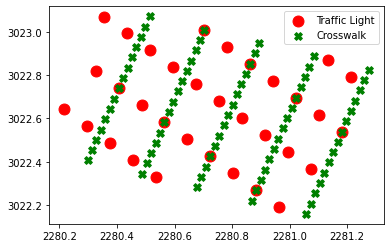

In [28]:
import matplotlib.pyplot as plt

plt.scatter(subset_a.X, subset_a.Y, s=120, c='r', label='Traffic Light')
plt.scatter(subset_b.X, subset_b.Y, marker='X', s=60, c='g', label='Crosswalk') 
plt.legend()

In [29]:
df3 = pd.read_excel(xls, 'Roads')

In [30]:
df3

,Unnamed: 0,ID,startNodeID,endNodeID,name
0,0,0,1,2,A Street
1,1,1,2,3,A Street
2,2,2,3,4,A Street
3,3,3,4,5,A Street
4,4,4,5,6,A Street
...,...,...,...,...,...
553,553,576,276,296,15th Ave
554,554,577,277,297,16th Ave
555,555,578,278,298,17th Ave
556,556,579,279,299,18th Ave


In [31]:
df_road_int = pd.merge(df3, df1, left_on = 'startNodeID', right_on = 'ID')

In [32]:
df_road_int

,Unnamed: 0_x,ID_x,startNodeID,endNodeID,name,Unnamed: 0_y,ID_y,X,Y
0,0,0,1,2,A Street,0,1,2280.154985,3022.452725
1,282,301,1,21,Lakeview Blvd,0,1,2280.154985,3022.452725
2,1,1,2,3,A Street,1,2,2280.202538,3022.437275
3,283,302,2,22,1st Ave,1,2,2280.202538,3022.437275
4,2,2,3,4,A Street,2,3,2280.250091,3022.421824
...,...,...,...,...,...,...,...,...,...
553,498,520,220,240,19th Ave,219,220,2281.212997,3022.634688
554,518,540,240,260,19th Ave,239,240,2281.228448,3022.682240
555,530,552,252,272,11st Ave,251,252,2280.863477,3022.853400
556,537,560,260,280,19th Ave,259,260,2281.243899,3022.729793


In [33]:
df_road_int = pd.merge(df_road_int, df1, left_on = 'endNodeID', right_on = 'ID')

In [ ]:
df_road_int

In [36]:
df_road_int = df_road_int.drop(['Unnamed: 0_x', 'ID_x', 'Unnamed: 0_y', 'ID_y', 'startNodeID', 'endNodeID', 'Unnamed: 0'], axis=1)

In [ ]:
df_road_int

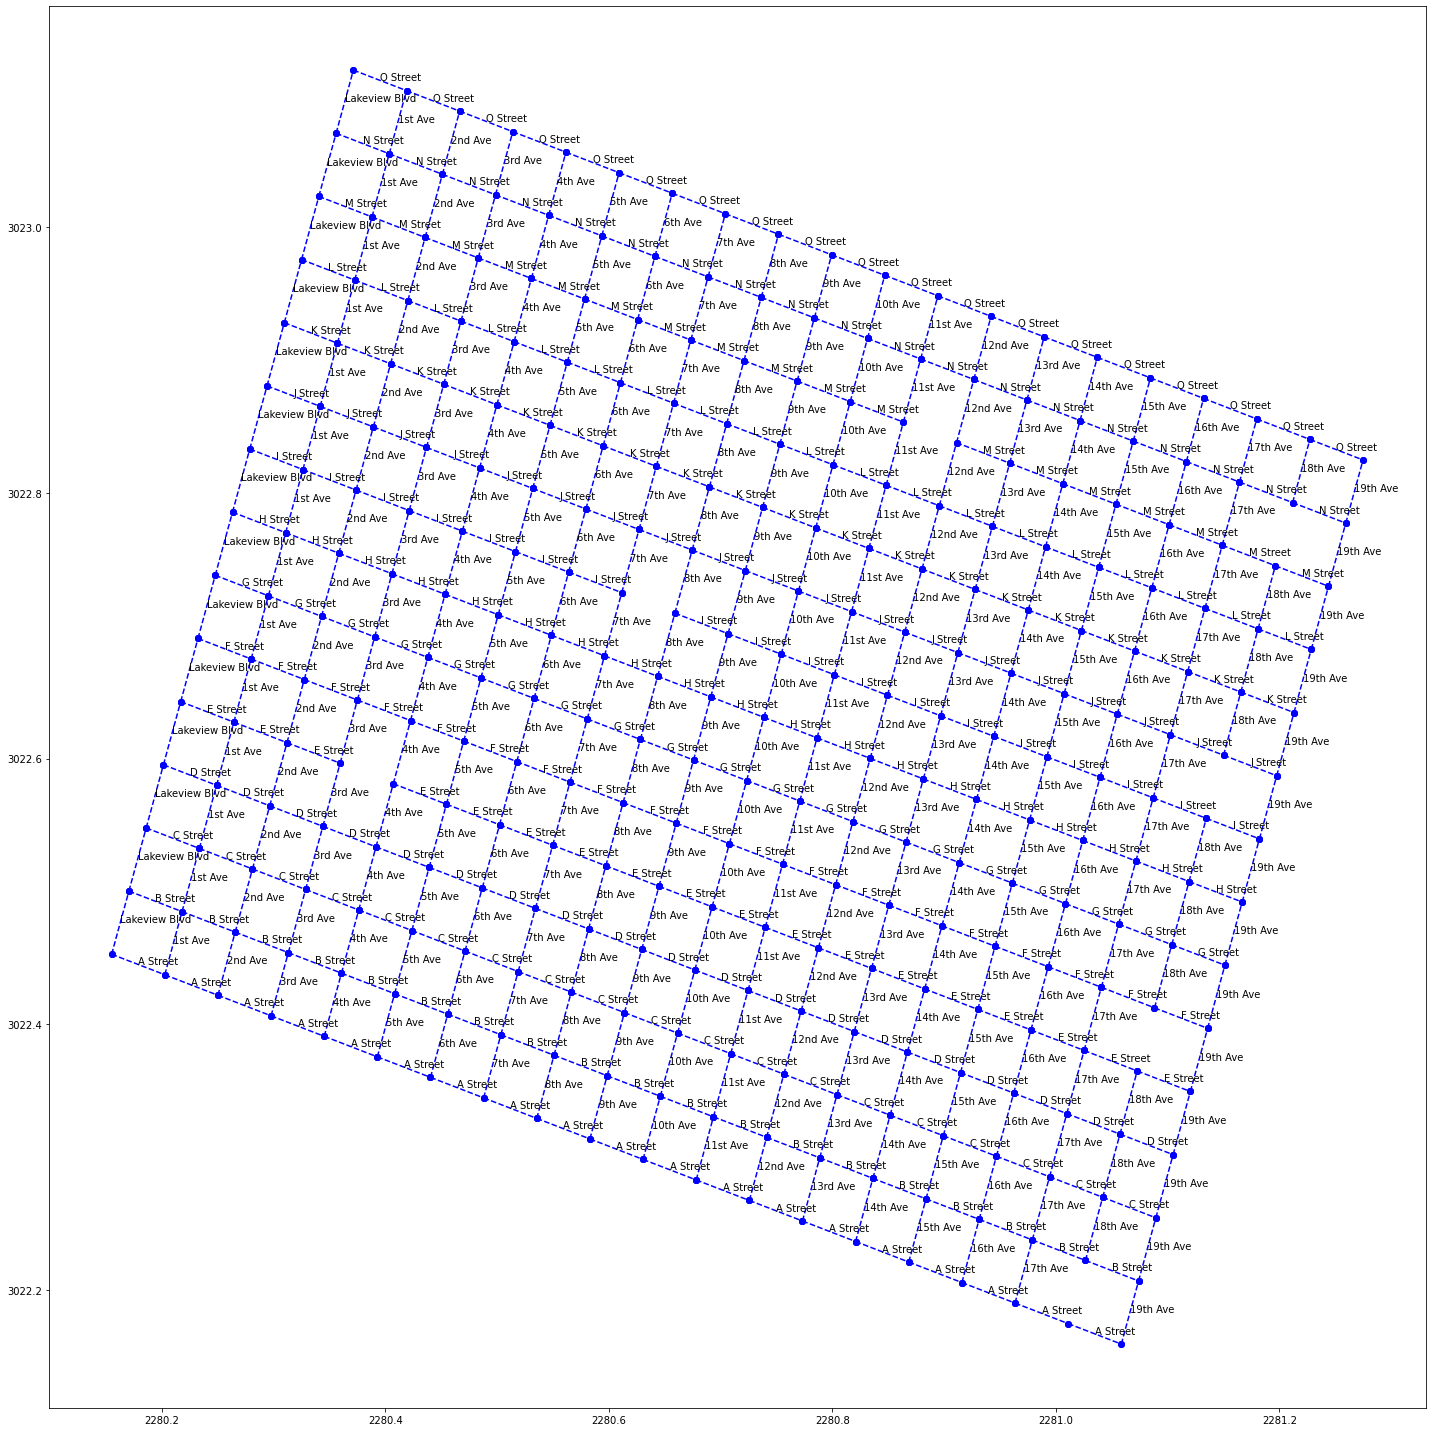

In [48]:
# df_road_int = df_road_int.reset_index()  # make sure indexes pair with number of rows
plt.rcParams["figure.figsize"] = [20, 20]
plt.rcParams["figure.autolayout"] = True

for index, row in df_road_int.iterrows():
    x_values = [row['X_x'], row['X_y']]
    y_values = [row['Y_x'], row['Y_y']]
    plt.plot(x_values, y_values, 'bo', linestyle="--")
    x_avg = (row['X_x'] + row['X_y'])/2
    y_avg = (row['Y_x'] + row['Y_y'])/2
    plt.text(x_avg, y_avg, row['name'])
plt.show()

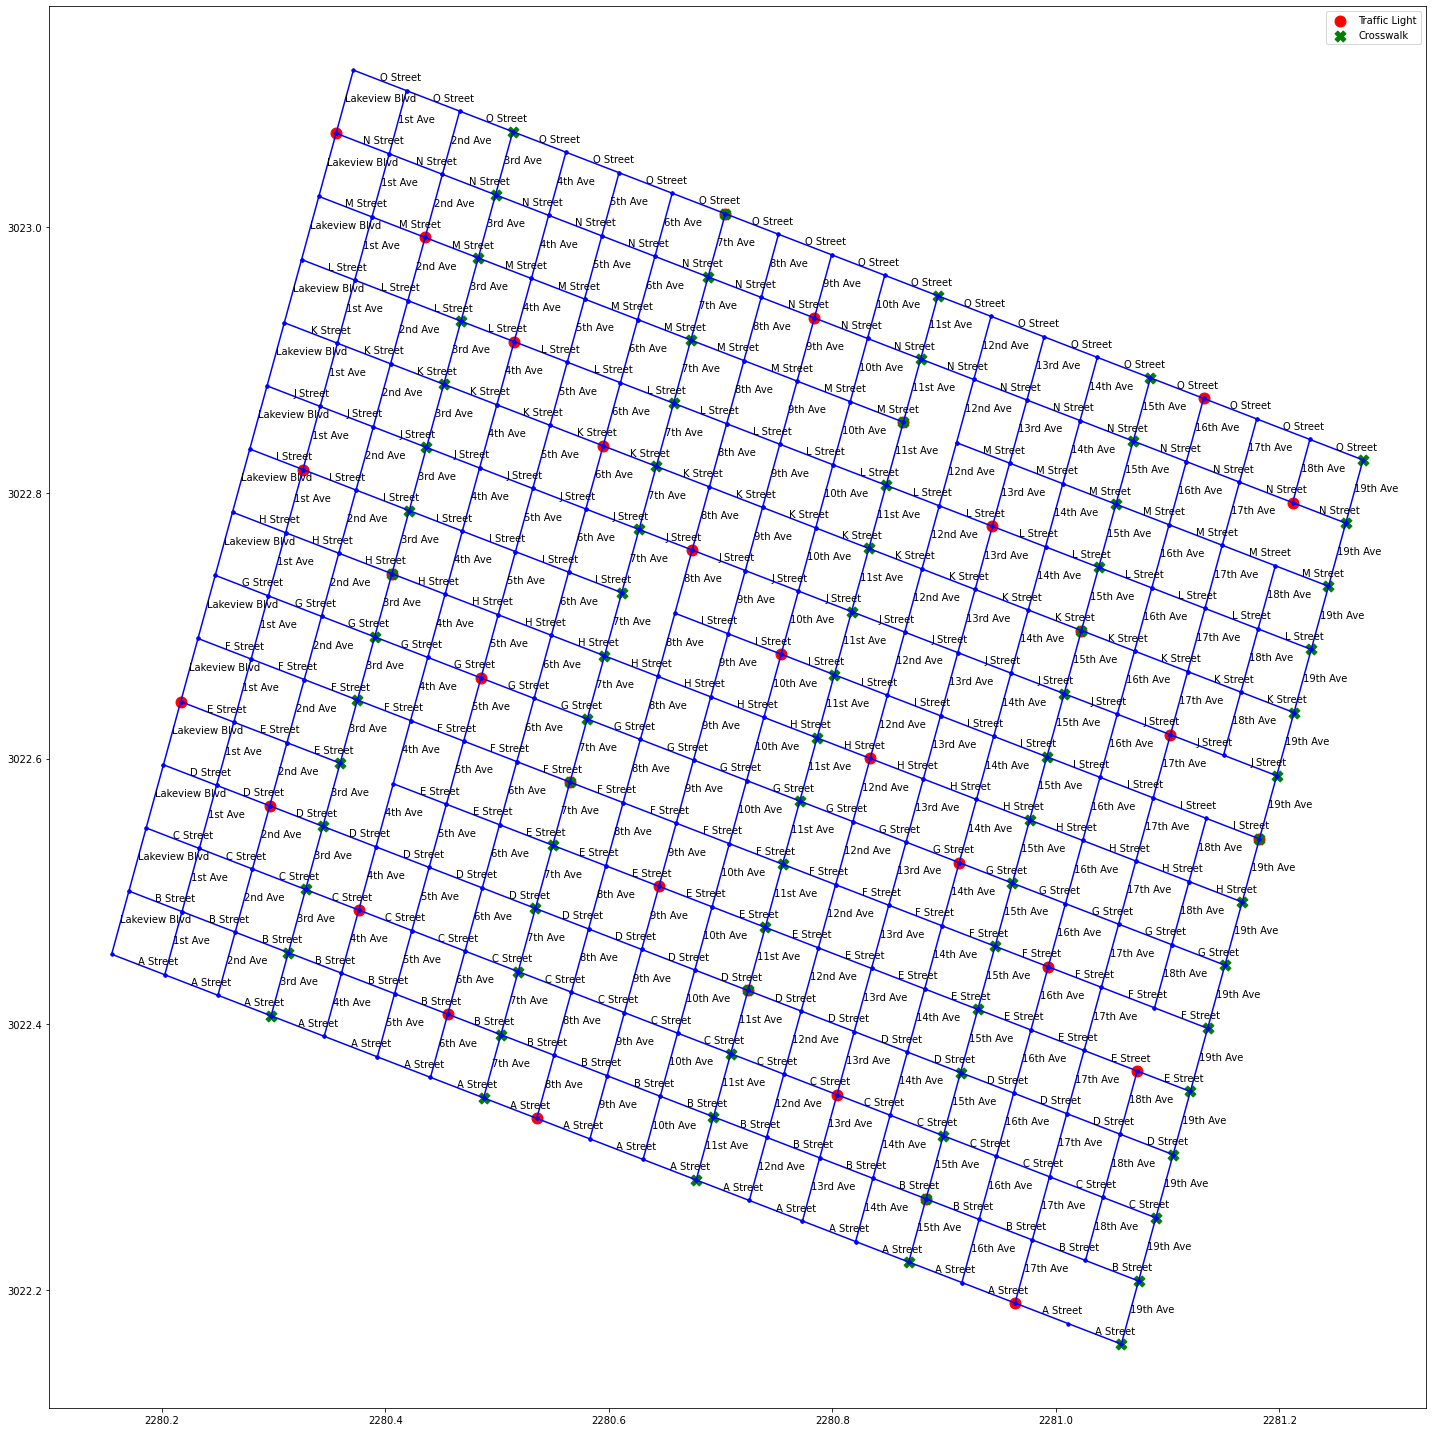

In [53]:
plt.rcParams["figure.figsize"] = [20, 20]
plt.rcParams["figure.autolayout"] = True

for index, row in df_road_int.iterrows():
    x_values = [row['X_x'], row['X_y']]
    y_values = [row['Y_x'], row['Y_y']]
    plt.plot(x_values, y_values, 'bo', marker='.', linestyle="solid")
    x_avg = (row['X_x'] + row['X_y'])/2
    y_avg = (row['Y_x'] + row['Y_y'])/2
    plt.text(x_avg, y_avg, row['name'])

plt.scatter(subset_a.X, subset_a.Y, s=120, c='r', label='Traffic Light')
plt.scatter(subset_b.X, subset_b.Y, marker='X', s=120, c='g', label='Crosswalk') 
plt.legend()

plt.show()